<a href="https://colab.research.google.com/github/YaminiKothapally/AI/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOUSE PRICE PREDICTION USING MACHINE LEARNING

## Loading the DataSet

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

#Seaborn for scatterplot and the striplot 
import seaborn as sbn

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/chennai_house_price_prediction.csv")
df.shape
#size of the dataset 'rows: 7109' and 'columns: 19'

(7109, 19)

In [4]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250


## Data Exploration

### Describe function

In [5]:
df.describe()
# describes the continuous variable based on the count, mean, standard deviation, minimum to maximum [25%, 50%, 75%]

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,495405.000000,2.366734e+07


- The number of missing values can be determined by the count of each continuous variables.
- Comparing the 75% and the max value, determines the presence of outliers in the dataset.

### Data types

In [6]:
df.dtypes
# displays the datatype associated with concerned datatype

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

How are we actually going to classify the **'categorical'** and **'continuous'** variable?
 - The variables with type **'object'** are **categorical** variables.
 - And the ones with **'int64'** and **'float64'** are **continuous** variables.

In [7]:
temp = pd.DataFrame(index=df.columns)
temp['data_type'] = df.dtypes
temp['null_count'] = df.isnull().sum()
temp['unique_count'] = df.nunique()
# upfront the temporary dataset has been created with 'columns: 3' and 'rows: 19' with information for every record like the datatypes, null_count and their corresponding unique count.  

In [8]:
temp

,data_type,null_count,unique_count
PRT_ID,object,0,7109
AREA,object,0,17
INT_SQFT,int64,0,1699
DIST_MAINROAD,int64,0,201
N_BEDROOM,float64,1,4
N_BATHROOM,float64,5,2
N_ROOM,int64,0,5
SALE_COND,object,0,9
PARK_FACIL,object,0,3
BUILDTYPE,object,0,5


### Histograms

Text(0.5, 0, 'Sales')

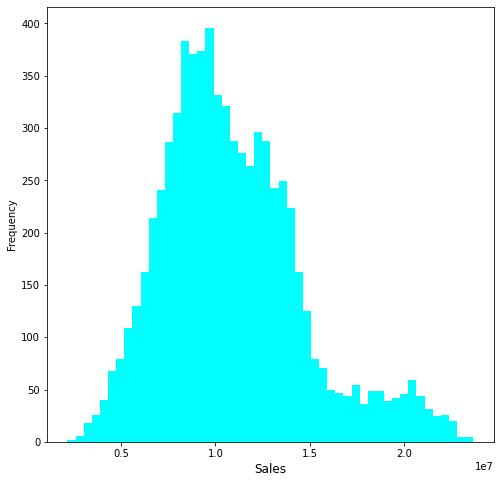

In [9]:
## target variable 

plt.figure(figsize=(8,8))
df['SALES_PRICE'].plot.hist(color="cyan",bins = 50)
plt.xlabel('Sales', fontsize=12)


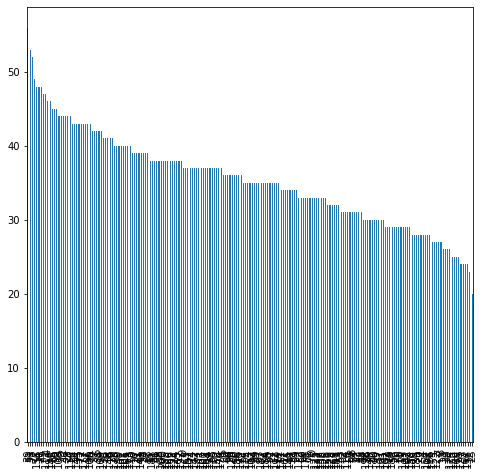

In [10]:
plt.figure(figsize=(8,8))
df['DIST_MAINROAD'].value_counts().plot(kind = 'bar')

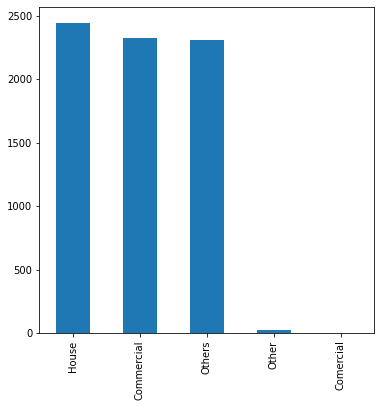

In [11]:
plt.figure(figsize=(6,6))
df['BUILDTYPE'].value_counts().plot(kind = 'bar')

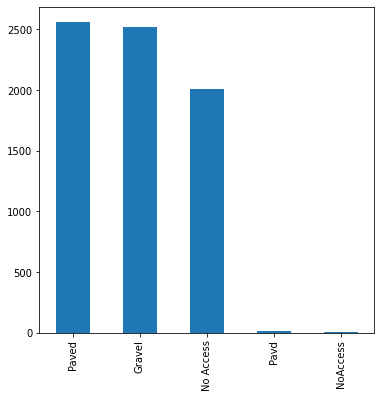

In [12]:
plt.figure(figsize=(6,6))
df['STREET'].value_counts().plot(kind = 'bar')

- The distribution of the target variable is slightly right skewed. 
- We can see a small number of houses with a very high price. 

# *********************** DATA MANIPULATION *******************************

### Summary of the missing vaules

In [13]:
# missing values present the dataset as per the variables

df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
COMMIS            0
SALES_PRICE       0
dtype: int64

In [14]:
df.drop_duplicates()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


### Remove the rows with missing values

In [15]:
# keeping the axis 0 will remove the duplicate rows from the dataset

df.dropna(axis=0, how='any')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,144400,7600000
1,P09411,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,304049,21717770
2,P01812,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,92114,13159200
3,P05346,Velachery,1855,14,3.0,2.0,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,77042,9630290
4,P06210,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.520,107060,5353000
7105,P10000,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,205551,10818480
7106,P09594,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,167028,8351410
7107,P06508,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.160,119098,8507000


- To make changes to original data, use inplace=True
- In this case, 54 rows removed

In [16]:
# keeping the axis 1 will remove the columns with duplicate values

df.dropna(axis=1, how='any')

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,131,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,144400,7600000
1,P09411,Anna Nagar,1986,26,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,304049,21717770
2,P01812,Adyar,909,70,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,92114,13159200
3,P05346,Velachery,1855,14,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,77042,9630290
4,P06210,Karapakkam,1226,84,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,51,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,107060,5353000
7105,P10000,Velachery,1897,52,5,Family,Yes,Others,NoSeWa,No Access,RH,3.6,4.5,3.3,205551,10818480
7106,P09594,Velachery,1614,152,4,Normal Sale,No,House,NoSeWa,Gravel,I,4.3,4.2,2.9,167028,8351410
7107,P06508,Karapakkam,787,40,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,119098,8507000


- When axis is set to 1, columns are dropped.
- For given data, 3 columns has missing values hence three columns dropped
- To avoid loss of data, we can use other ways of imputation

### Mean / Median for Continuous variables and Mode for the Categorical variables

#### N_BEDROOM (Categorical Variables)

In [17]:
df['N_BEDROOM'].dtype

dtype('float64')

'**O**' : refers to the **Object** type i.e Categorical variable

In [18]:
df['N_BEDROOM'].mode()

0    1.0
dtype: float64

In [19]:
df['N_BEDROOM'].fillna(value = (df['N_BEDROOM'].mode()[0]), inplace=True)

Filled the missing place in the dataset for the variable N_BEDROOM and made changes to the dataset too.

In [20]:
df.loc[df['N_BEDROOM'].isnull()==True]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE


Right now for the variable N_BEDROOM we have imputed the mode value in missing places so the output for the .isnull() is going to be a empty dataset.

#### N_BATHROOM (Categorical Variables)

In [21]:
df.loc[df['N_BATHROOM'].isnull()==True]

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
70,P05304,Anna Nagar,1589,39,1.0,NaN,4,Partial,No,Others,AllPub,Gravel,RL,2.1,2.5,4.5,3.16,85486,12212350
5087,P01333,Chrompet,1016,105,1.0,NaN,3,AbNormal,Yes,Others,NoSewr,Gravel,RM,3.2,4.2,2.0,3.24,106479,10647920
6134,P01332,Chormpet,916,173,1.0,NaN,3,Normal Sale,Yes,Others,ELO,Paved,RL,3.4,3.5,3.0,NaN,44237,8847420
6371,P01189,Chrompet,1035,90,1.0,NaN,3,Partial,No,Others,NoSeWa,No Access,RM,2.3,3.5,3.2,3.05,24823,8274200
6535,P09189,Anna Nagar,1864,184,2.0,NaN,5,Family,Yes,Others,NoSewr,Paved,RM,3.3,3.7,4.7,3.96,124455,15556920


In [22]:
for i in range(0, len(df)):
    if pd.isnull(df['N_BATHROOM'][i])==True:
        if (df['N_BEDROOM'][i] == 1.0):
            df['N_BATHROOM'][i] = 1.0
        else: 
            df['N_BATHROOM'][i] = 2.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


- A for loop is being runned over the dataset locating the null / NaN values in the N_BATHROOM variable and based on the value in the N_BEDROOM the value for the  N_BATHROOM is computed.

#### QS_OVERALL (Continuous Variable)

In [23]:
df['QS_OVERALL'].dtype

dtype('float64')

In [24]:
df[[ 'QS_ROOMS','QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL']].head()

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL
0,4.0,3.9,4.9,4.330
1,4.9,4.2,2.5,3.765
2,4.1,3.8,2.2,3.090
3,4.7,3.9,3.6,4.010
4,3.0,2.5,4.1,3.290


In [25]:
temp = (df['QS_ROOMS'] + df['QS_BATHROOM'] + df['QS_BEDROOM'])/3
temp.name = 'Average'
pd.concat([df['QS_ROOMS'], df['QS_BATHROOM'], df['QS_BEDROOM'], temp], axis=1).head(10)

,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,Average
0,4.0,3.9,4.9,4.266667
1,4.9,4.2,2.5,3.866667
2,4.1,3.8,2.2,3.366667
3,4.7,3.9,3.6,4.066667
4,3.0,2.5,4.1,3.200000
5,4.5,2.6,3.1,3.400000
6,3.6,2.1,2.5,2.733333
7,2.4,4.5,2.1,3.000000
8,2.9,3.7,4.0,3.533333
9,3.1,3.1,3.3,3.166667


- Imputing missing values with the help of other 'quality score' columns
- Additionally we can assign higher weights to n_bedroom and lower to n_bathroom

In [26]:
df.loc[df['QS_OVERALL'].isnull()==True].shape

(48, 19)

In [27]:
def fill_na(x):
    return ((x['QS_ROOMS'] + x['QS_BATHROOM'] + x['QS_BEDROOM'])/3)

In [28]:
df['QS_OVERALL'] =  df.apply(lambda x: fill_na(x) if pd.isnull(x['QS_OVERALL']) else x['QS_OVERALL'], axis=1)

There's a lambda function applied on the QS_OVERALL variable, and called when the null value is encountered.


In [29]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

### Change the datatypes of certain variables

In [30]:
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [31]:
# data type of n_bedroom, n_room, n_bathroom

df = df.astype({'N_BEDROOM': 'object', 'N_ROOM': 'object', 'N_BATHROOM': 'object'})
df = df.astype({'QS_ROOMS': 'int64', 'QS_BATHROOM': 'int64', 'QS_BEDROOM': 'int64', 'QS_OVERALL': 'int64'})

astypes is used to change the datatype of variable.

### Replace categories

In [32]:
temp = ['AREA','N_BEDROOM','N_BATHROOM','N_ROOM','SALE_COND','PARK_FACIL','BUILDTYPE','UTILITY_AVAIL','STREET','MZZONE']
for i in temp:
    print('************ Value Count in', i, '************')
    print(df[i].value_counts())
    print('')

************ Value Count in AREA ************
Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

************ Value Count in N_BEDROOM ************
1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

************ Value Count in N_BATHROOM ************
1.0    5593
2.0    1516
Name: N_BATHROOM, dtype: int64

************ Value Count in N_ROOM ************
4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

************ Value Count in SALE_COND ************
AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE

### Update names in columns
- AREA
- SALE_COND
- PARK_FACIL
- BUILDTYPE
- UTILITY_AVAIL
- STREET

In [33]:
df['PARK_FACIL'].replace({'Noo':'No'}, inplace = True)
df['PARK_FACIL'].value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [34]:
df['AREA'].replace({'TNagar':'T Nagar', 'Adyr': 'Adyar', 'KKNagar': 'KK Nagar',  
                    'Chrompt': 'Chrompet', 'Chormpet': 'Chrompet','Chrmpet': 'Chrompet',
                    'Ana Nagar': 'Anna Nagar', 'Ann Nagar': 'Anna Nagar',
                     'Karapakam': 'Karapakkam' , 'Velchery': 'Velachery'}, inplace = True)

In [35]:
df['AREA'].replace({'Chrompet':'Kashibugga','Karapakkam':'Phatak Street','KK Nagar':'Kakatiya Colony',
                    'Velachery':'Balasamudram','Anna Nagar':'Advocate Colony','Adyar':'Subedari',
                    'T Nagar':'Teachers Colony'}, inplace = True)

In [36]:
df['AREA'].value_counts()

Kashibugga         1702
Phatak Street      1366
Kakatiya Colony     997
Balasamudram        981
Advocate Colony     788
Subedari            774
Teachers Colony     501
Name: AREA, dtype: int64

In [37]:
df['SALE_COND'].replace({'PartiaLl':'Partial', 'Partiall': 'Partial', 
                         'Adj Land': 'AdjLand',  
                         'Ab Normal': 'AbNormal'}, inplace = True)
df['SALE_COND'].value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [38]:
df['BUILDTYPE'].replace({'Comercial':'Commercial', 'Other': 'Others'},inplace = True)


In [39]:
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [40]:
df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE
0,P03210,Phatak Street,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4,3,4,4,144400,7600000
1,P09411,Advocate Colony,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4,4,2,3,304049,21717770
2,P01812,Subedari,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4,3,2,3,92114,13159200
3,P05346,Balasamudram,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4,3,3,4,77042,9630290
4,P06210,Phatak Street,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3,2,4,3,74063,7406250


In [41]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [42]:
df.shape


(7109, 19)

In [43]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [44]:
df['UTILITY_AVAIL'].replace({'All Pub':'AllPub', 'NoSeWa':'NoSewa'},inplace = True)

In [45]:
df['UTILITY_AVAIL'].value_counts()

AllPub     1887
NoSewa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [46]:
df['STREET'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [47]:
df['STREET'].replace({'NoAccess':'No Access', 'Pavd':'Paved'},inplace = True)

# BIVARIATE ANALYSIS

In [48]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE'],
      dtype='object')

- A very clear linear relationship can be seen between the interior area and sales price
- These variables have a positive correlation

In [49]:
df['BUILDTYPE'].value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

** 2. Sales Price against no of bedroom and bathroom**

In [50]:
# sale price of houses wrt number of bedrooms and bathroomms 
df.pivot_table(values='SALES_PRICE', index='N_BEDROOM', columns='N_BATHROOM', aggfunc='median')

N_BATHROOM,1.0,2.0
N_BEDROOM,,
1.0,9168740.0,NaN
2.0,12129780.0,9125250.0
3.0,NaN,11663490.0
4.0,NaN,13172000.0


**3. QS_OVERALL and sales price **

- Distribution of number of houses in each quartile is same for 'QS_ROOMS', 'QS_BATHROOM','QS_BEDROOM'
- For QS_OVERALL, 50 % of values lie in a very small range of ~3.2 to 3.7 score

** 4. Building type and sales price**

In [51]:
# SALE PRICE based on building type

df.groupby('BUILDTYPE').SALES_PRICE.median()

BUILDTYPE
Commercial    13356200
House          8985370
Others         9637260
Name: SALES_PRICE, dtype: int64

- Houses built for commercial purposes have a considerably higher sale price
- Houses with additional facility should have higher price

**5. Building type and parking facility**

In [52]:
# building type and parking facility

df.groupby(['BUILDTYPE', 'PARK_FACIL']).SALES_PRICE.median()

BUILDTYPE   PARK_FACIL
Commercial  No            12692985
            Yes           13920600
House       No             8514140
            Yes            9468150
Others      No             9104645
            Yes           10039405
Name: SALES_PRICE, dtype: int64

- For all three categories, houses with park facility have a higher price
- we can use groupby function to generate a plot for better comparison

In [53]:
# average price for each area category

df.pivot_table(values='SALES_PRICE', index='AREA', aggfunc='median')

,SALES_PRICE
AREA,
Advocate Colony,13727895
Balasamudram,10494410
Kakatiya Colony,12146740
Kashibugga,9606725
Phatak Street,7043125
Subedari,8878350
Teachers Colony,14049650


In [54]:
df.groupby(['STREET']).SALES_PRICE.median()

STREET
Gravel       10847225
No Access     9406050
Paved        10470070
Name: SALES_PRICE, dtype: int64

- Both gravel and paved roads have approximately same sale price
- Houses marked with 'no access' have a lower sale price

## Feature Engineering

In [55]:
new_df = df.copy()
new_df['Price_per_sqft'] = new_df['SALES_PRICE']/new_df['INT_SQFT']

In [56]:
new_df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE', 'Price_per_sqft'],
      dtype='object')

In [57]:
new_df.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE,Price_per_sqft
0,P03210,Phatak Street,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4,3,4,4,144400,7600000,7569.721116
1,P09411,Advocate Colony,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4,4,2,3,304049,21717770,10935.433031
2,P01812,Subedari,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4,3,2,3,92114,13159200,14476.567657
3,P05346,Balasamudram,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4,3,3,4,77042,9630290,5191.530997
4,P06210,Phatak Street,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3,2,4,3,74063,7406250,6040.986949


In [58]:
new_df[new_df['INT_SQFT']/new_df['N_ROOM']<300].head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE,Price_per_sqft
31,P02696,Subedari,868,15,1,1,3,Normal Sale,No,Others,NoSewa,Gravel,RL,2,2,2,2,72336,9042050,10417.108295
38,P02247,Kashibugga,856,36,1,1,3,AdjLand,Yes,Others,NoSewr,Gravel,RM,2,3,3,3,103834,10383420,12130.163551
43,P05298,Phatak Street,507,49,1,1,2,AbNormal,Yes,House,ELO,Gravel,RH,2,4,4,4,74464,5728000,11297.830375
55,P01934,Phatak Street,545,154,1,1,2,Partial,No,Others,ELO,No Access,RH,3,2,3,2,88651,3854375,7072.247706
73,P02813,Subedari,890,116,1,1,3,AbNormal,Yes,House,NoSewr,Paved,C,2,4,5,4,43124,7187350,8075.674157


In [59]:
new_df['INT_SQFT'].describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [60]:
new_df['SALES_PRICE'].describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [61]:
new_df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE',
       'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM',
       'QS_BEDROOM', 'QS_OVERALL', 'COMMIS', 'SALES_PRICE', 'Price_per_sqft'],
      dtype='object')

In [62]:
dummies_0 = pd.get_dummies(new_df['AREA'])
dummies_1 = pd.get_dummies(new_df['PARK_FACIL'])
dummies_2 = pd.get_dummies(new_df['BUILDTYPE'])
dummies_3 = pd.get_dummies(new_df['STREET'])

In [63]:
new_df_1 = pd.concat([new_df,dummies_0,dummies_1,dummies_2,dummies_3], axis='columns')

In [64]:
new_df_1.head()

,PRT_ID,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,COMMIS,SALES_PRICE,Price_per_sqft,Advocate Colony,Balasamudram,Kakatiya Colony,Kashibugga,Phatak Street,Subedari,Teachers Colony,No,Yes,Commercial,House,Others,Gravel,No Access,Paved
0,P03210,Phatak Street,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4,3,4,4,144400,7600000,7569.721116,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1
1,P09411,Advocate Colony,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4,4,2,3,304049,21717770,10935.433031,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,P01812,Subedari,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4,3,2,3,92114,13159200,14476.567657,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0
3,P05346,Balasamudram,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4,3,3,4,77042,9630290,5191.530997,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
4,P06210,Phatak Street,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3,2,4,3,74063,7406250,6040.986949,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0


# Machine Learning Model building

In [65]:
final_df = new_df_1.drop(['PRT_ID', 'AREA', 'DIST_MAINROAD', 'SALE_COND', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE','COMMIS', 'Price_per_sqft','PARK_FACIL'],axis='columns')

In [66]:
final_df.shape

(7109, 24)

In [67]:
final_df.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Advocate Colony,Balasamudram,Kakatiya Colony,Kashibugga,Phatak Street,Subedari,Teachers Colony,No,Yes,Commercial,House,Others,Gravel,No Access,Paved
0,1004,1,1,3,4,3,4,4,7600000,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1
1,1986,2,1,5,4,4,2,3,21717770,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,909,1,1,3,4,3,2,3,13159200,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0
3,1855,3,2,5,4,3,3,4,9630290,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
4,1226,1,1,3,3,2,4,3,7406250,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0


**FINAL DATAFRAME IS READY**

### Train test split


X contains all the independant variables

In [68]:
X = final_df.drop('SALES_PRICE',axis='columns')
X.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,Advocate Colony,Balasamudram,Kakatiya Colony,Kashibugga,Phatak Street,Subedari,Teachers Colony,No,Yes,Commercial,House,Others,Gravel,No Access,Paved
0,1004,1,1,3,4,3,4,4,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1
1,1986,2,1,5,4,4,2,3,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,909,1,1,3,4,3,2,3,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0
3,1855,3,2,5,4,3,3,4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
4,1226,1,1,3,3,2,4,3,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0


y contains all the dependant variables

In [69]:
y = final_df.SALES_PRICE
y.head()

0     7600000
1    21717770
2    13159200
3     9630290
4     7406250
Name: SALES_PRICE, dtype: int64

# MACHINE LEARNING PART

In [70]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
# linear regression model

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
score = lr_model.score(X_test, y_test)
print('The accuracy of the Linear Regression model is about {int(score*100)} %')

In [72]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
pred_Train = lr_model.predict(X_train)
pred_Test = lr_model.predict(X_test)
print('Training Error:')
print('Mean Absolute Error =', mean_absolute_error(pred_Train, y_train))
print('Mean Square Error =', mean_squared_error(pred_Train, y_train))
print('Root Mean Square Error =', mean_squared_error(pred_Train, y_train) ** 0.5)
print('Testing Error:')
print('Mean Absolute Error =', mean_absolute_error(pred_Test, y_test))
print('Mean Square Error =', mean_squared_error(pred_Test, y_test))
print('Root Mean Square Error =', mean_squared_error(pred_Test, y_test) ** 0.5)

Training Error:
Mean Absolute Error = 902859.0937483961
Mean Square Error = 1273241232882.9175
Root Mean Square Error = 1128379.9151362618
Testing Error:
Mean Absolute Error = 930668.7605578213
Mean Square Error = 1371941587822.4978
Root Mean Square Error = 1171299.1026302795


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier

def findBestModel(X,y):
    algos = {
        
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True,False]
            }
        },
        
       
             'random_forest':{
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
      
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'Model': algo_name,
            'Scores in %': gs.best_score_*100,
            'Best parameters': gs.best_params_
        })
    
    return pd.DataFrame(scores, columns=['Model', 'Scores in %', 'Best parameters'])

# running the findBestModel function
findBestModel(X, y)

        

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

,Model,Scores in %,Best parameters
0,linear_regression,90.684964,{'normalize': True}
1,random_forest,89.105135,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,decision_tree,89.269620,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


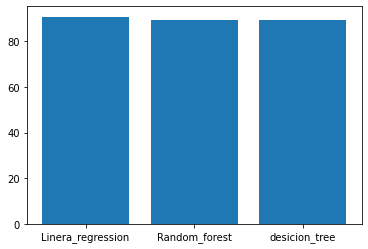

In [74]:
acc=[90.68,89.09,89.35];
ticks=[0,1,2]
models=['Linera_regression','Random_forest','desicion_tree']
fig=plt.figure()
plt.bar(ticks,acc,align='center')
plt.xticks(ticks,models)
plt.show()


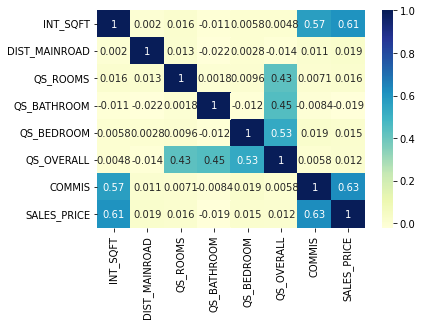

In [75]:
import seaborn as sb
dataplot = sb.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [76]:
X.columns

Index(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'Advocate Colony',
       'Balasamudram', 'Kakatiya Colony', 'Kashibugga', 'Phatak Street',
       'Subedari', 'Teachers Colony', 'No', 'Yes', 'Commercial', 'House',
       'Others', 'Gravel', 'No Access', 'Paved'],
      dtype='object')

In [77]:
def predictPrice(location, parking, houseType, streetType, INT_SQFT, N_BEDROOM, N_BATHROOM, N_ROOM, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL):
    loc_index = np.where(X.columns == location)[0][0]
    park_index = np.where(X.columns == parking)[0][0]
    house_index = np.where(X.columns == houseType)[0][0]
    street_index = np.where(X.columns == streetType)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = INT_SQFT
    x[1] = N_BEDROOM
    x[2] = N_BATHROOM
    x[3] = N_ROOM
    x[4] = QS_ROOMS
    x[5] = QS_BATHROOM
    x[6] = QS_BEDROOM
    x[7] = QS_OVERALL
    
    # setting the location index
    if loc_index >= 0:
        x[loc_index] = 1
    
    #setting the parking index
    if park_index >= 0:
        x[park_index] = 1
    
    # setting the house typr index
    if house_index >= 0:
        x[house_index] = 1
    
    # setting the street type index
    if street_index >= 0:
        x[street_index] = 1
    
    
    # return the estimated house price
    predictedPrice = lr_model.predict([x])[0]
    return int(predictedPrice)

In [78]:
final_df.head(1)

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,Advocate Colony,Balasamudram,Kakatiya Colony,Kashibugga,Phatak Street,Subedari,Teachers Colony,No,Yes,Commercial,House,Others,Gravel,No Access,Paved
0,1004,1,1,3,4,3,4,4,7600000,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1


In [79]:
# parameters for predictPrice function are: 
# location, parking, houseType, streetType, INT_SQFT, N_BEDROOM, N_BATHROOM, N_ROOM, QS_ROOMS, QS_BATHROOM, QS_BEDROOM, QS_OVERALL

predictPrice('Advocate Colony','Yes','House','Paved',1004,1,1,3,4,3,4,4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


10787984

In [80]:
predictPrice('Advocate Colony','No','House','Paved',1004,1,1,3,4,3,4,4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


9785864

In [81]:
predictPrice('Advocate Colony','No','House','Paved',1004,1,1,5,4,3,4,4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


10022493

In [82]:
predictPrice('Teachers Colony','Yes','Others','Gravel',900,1,2,5,4,3,3,4)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


11725326

**Exporting our Machine Learning model to a pickle file**

In [83]:
import pickle

with open('Machine_Learning_Model.pickle', 'wb') as f:
    pickle.dump(lr_model,f)

**Exporting the columns indexing information through a json file**

In [84]:
import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))

In [85]:
final_df.dtypes

INT_SQFT            int64
N_BEDROOM          object
N_BATHROOM         object
N_ROOM             object
QS_ROOMS            int64
QS_BATHROOM         int64
QS_BEDROOM          int64
QS_OVERALL          int64
SALES_PRICE         int64
Advocate Colony     uint8
Balasamudram        uint8
Kakatiya Colony     uint8
Kashibugga          uint8
Phatak Street       uint8
Subedari            uint8
Teachers Colony     uint8
No                  uint8
Yes                 uint8
Commercial          uint8
House               uint8
Others              uint8
Gravel              uint8
No Access           uint8
Paved               uint8
dtype: object

In [86]:
def printmax():
    print("MAXIMUM sQFT: ",final_df['INT_SQFT'].max())
    print("MAXIMUM BEDROOMS: ",final_df['N_BEDROOM'].max())
    print("MAXIMUM BATHROOMS: ",final_df['N_BATHROOM'].max())
    print("MAXIMUM ROOMS: ",final_df['N_ROOM'].max())
    print("MAXIMUM QS_ROOMS: ",final_df['QS_ROOMS'].max())
    print("MAXIMUM QS_BATHROOM: ",final_df['QS_BATHROOM'].max())
    print("MAXIMUM QS_BEDROOM: ",final_df['QS_BEDROOM'].max())
    print("MAXIMUM QS_OVERALL: ",final_df['QS_OVERALL'].max())

    

In [87]:
printmax()

MAXIMUM sQFT:  2500
MAXIMUM BEDROOMS:  4.0
MAXIMUM BATHROOMS:  2.0
MAXIMUM ROOMS:  6
MAXIMUM QS_ROOMS:  5
MAXIMUM QS_BATHROOM:  5
MAXIMUM QS_BEDROOM:  5
MAXIMUM QS_OVERALL:  4


In [88]:
final_df.columns

Index(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE',
       'Advocate Colony', 'Balasamudram', 'Kakatiya Colony', 'Kashibugga',
       'Phatak Street', 'Subedari', 'Teachers Colony', 'No', 'Yes',
       'Commercial', 'House', 'Others', 'Gravel', 'No Access', 'Paved'],
      dtype='object')

In [89]:
final_df['SALES_PRICE'].max()

23667340

In [90]:
final_df['SALES_PRICE'].describe()

count    7.109000e+03
mean     1.089491e+07
std      3.768603e+06
min      2.156875e+06
25%      8.272100e+06
50%      1.033505e+07
75%      1.299390e+07
max      2.366734e+07
Name: SALES_PRICE, dtype: float64

In [91]:
final_df['SALES_PRICE'].min()

2156875

## TESTING THE MODEL USING DIFFERENT TEST CASES

In [92]:
def testPredict(location, parking, houseType, streetType, sqft, r1,r2,r3,q1,q2,q3,q4):
    try:
        predictedPrice = predictPrice(location,parking,houseType,streetType,sqft,r1,r2,r3,q1,q2,q3,q4)
        if(final_df['SALES_PRICE'].min() <  predictedPrice and predictedPrice < final_df['SALES_PRICE'].max()):
            print("TEST CASE PASSED")
        else:
            print("PREDICTED PRICE WRONG")
    
    except IndexError as e:
        print("TEST CASE FAILED")

In [93]:
testPredict('Advocate Colony','No','House','Paved',1004,1,1,5,4,3,4,4)

TEST CASE PASSED


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [94]:
testPredict('Advocate Colony','No','House','Gravel',1004,1,1,3,4,3,4,4)

TEST CASE PASSED


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [95]:
testPredict('Advocate Colony','No','Commercial','Paved',1004,1,1,5,4,3,4,4)

TEST CASE PASSED


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [96]:
testPredict('Hanamkonda','No','House','Paved',1004,1,1,5,4,3,4,4)

TEST CASE FAILED


In [97]:
final_df['INT_SQFT'].describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [98]:
final_df['N_BEDROOM'].describe()

count     7109.0
unique       4.0
top          1.0
freq      3796.0
Name: N_BEDROOM, dtype: float64

In [99]:
final_df.columns


Index(['INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE',
       'Advocate Colony', 'Balasamudram', 'Kakatiya Colony', 'Kashibugga',
       'Phatak Street', 'Subedari', 'Teachers Colony', 'No', 'Yes',
       'Commercial', 'House', 'Others', 'Gravel', 'No Access', 'Paved'],
      dtype='object')

In [100]:
final_df['QS_OVERALL'].max()

4